In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle as pk
import keras
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from keras.datasets import mnist


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
X_test_mnist_re = X_test_mnist.reshape(10000,784)
X_train_mnist_re = X_train_mnist.reshape(60000,784)

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
y_train_mnist = pd.Series(y_train_mnist)
X_train_mnist_re =  pd.DataFrame(X_train_mnist_re)
y_test_mnist = pd.Series(y_test_mnist)
X_test_mnist_re =  pd.DataFrame(X_test_mnist_re)

In [7]:
X_train_mnist_re.shape, y_train_mnist.shape,type(X_train_mnist_re),type(y_train_mnist)

((60000, 784),
 (60000,),
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [8]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pk.load(fo, encoding='bytes')
    return data

In [9]:
mnist = unpickle("/content/drive/MyDrive/dataset/MNIST-120k")

In [10]:
y_train_qmnist = pd.Series(mnist['labels'].reshape(120000))
X_train_qmnist = mnist['data']

X_train_qmnist.shape, y_train_qmnist.shape,type(X_train_qmnist),type(y_train_qmnist)

((120000, 28, 28), (120000,), numpy.ndarray, pandas.core.series.Series)

In [11]:
X_train_qmnist_re = X_train_qmnist.reshape(120000,784)
X_train_qmnist_re = pd.DataFrame(X_train_qmnist_re)

X_train_mnist_re.shape,X_train_qmnist_re.shape

((60000, 784), (120000, 784))

In [12]:
X_train = pd.concat([X_train_mnist_re,X_train_qmnist_re],axis=0)
X_train = pd.concat([X_train,X_test_mnist_re],axis=0)

In [13]:
y_train_mnist.shape,y_train_qmnist.shape

((60000,), (120000,))

In [14]:
y_train = pd.concat([y_train_mnist,y_train_qmnist],axis=0)
y_train = pd.concat([y_train,y_test_mnist],axis=0)

In [15]:
X_train.shape, y_train.shape

((190000, 784), (190000,))

In [16]:
import os
def Prep(img):
    """
    :param img: image of number
    :return: binary image
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img, 125, 255,
                                cv2.THRESH_BINARY_INV)
    return np.array(thresh)

def load_digits():
    """
    loading digits from folder for model training
    """
    Slozka = r'/content/drive/MyDrive/Digits/'
    Kategorie = [str(cislo) for cislo in range(10)]
    data2 = []
    for category in Kategorie:
        folder = os.path.join(Slozka, category)
        for img in os.listdir(folder):
            img_path = os.path.join(folder, img)
            label = int(Kategorie.index(category))
            arr = cv2.imread(img_path)
            new_arr = cv2.resize(arr, (40, 40))
            new_arr = Prep(new_arr)
            data2.append([new_arr, label])
    return data2

In [17]:
X = []
y = []
data = load_digits()

for features, label in data:
    X.append(features)
    y.append(label)



In [18]:
X = np.array(X)
y = np.array(y)
print(X.shape)

(9856, 40, 40)


In [19]:
Xtmp = [cv2.resize(x,(28,28)) for x in X]
Xtmp = np.array(Xtmp)
print(Xtmp.shape)
print(y.shape)

(9856, 28, 28)
(9856,)


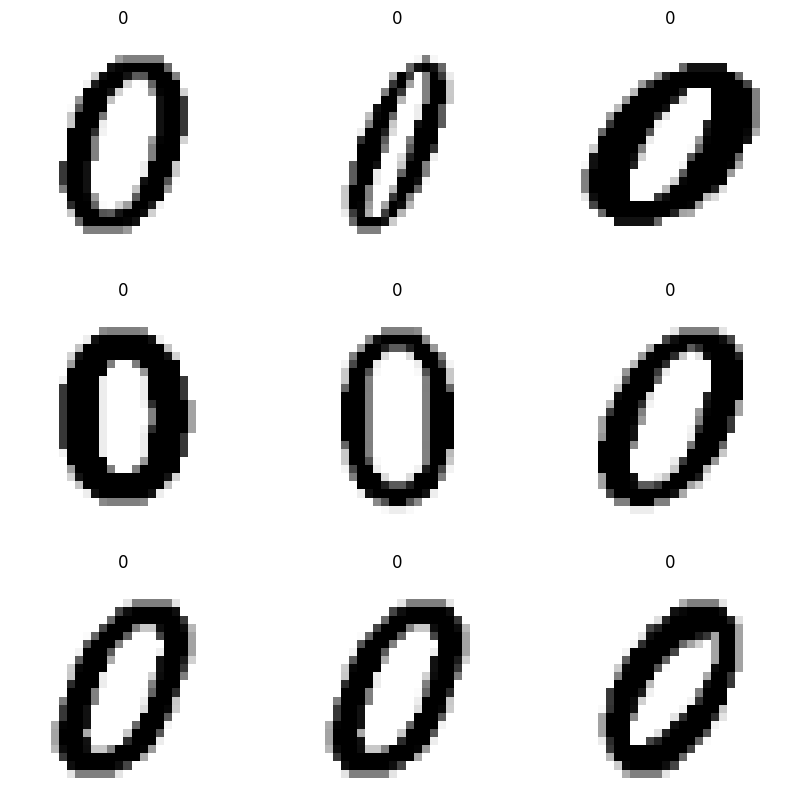

In [20]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtmp[i], cmap=plt.cm.binary)
    plt.title(y[i])
    plt.axis("off")
plt.show()

In [21]:
Xtmp = Xtmp.reshape(9856,784)
Xtmp = pd.DataFrame(Xtmp)
print(Xtmp.shape)

(9856, 784)


In [22]:
X_trainz = pd.concat([X_train,Xtmp],axis=0)
# X_trainz = X_train

In [23]:
y = pd.DataFrame(y)
y.shape

(9856, 1)

In [24]:
y_train = pd.concat([y_train,y],axis=0)
# y_train = pd.DataFrame(y_train)

In [25]:
print(X_trainz.shape, y_train.shape)

(199856, 784) (199856, 1)


In [26]:
X_trainz = np.array(X_trainz)
Y_train = y_train.values

In [27]:
i = 0
top = X_trainz.shape[0]
while True:
  if i == top:
    break
  if Y_train[i][0] == 0:
    X_trainz = np.delete(X_trainz, i, axis=0)
    Y_train = np.delete(Y_train, i, axis=0)
    top = top -1
    continue
  i = i+1


In [28]:
X_train = X_trainz.reshape(top, 28, 28)


# X_train = Xtmp
# Y_train = y

In [29]:
X_train = np.array(X_train)
X_train.shape

(180109, 28, 28)

In [30]:
# def change_brightness(img, alpha, beta):
#     img_new = np.asarray(alpha*img + beta, dtype=int)   # cast pixel values to int
#     img_new[img_new>255] = 255
#     img_new[img_new<0] = 0
#     return img_new

# X_train = [change_brightness(x,5.0,40) for x in X_train]

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


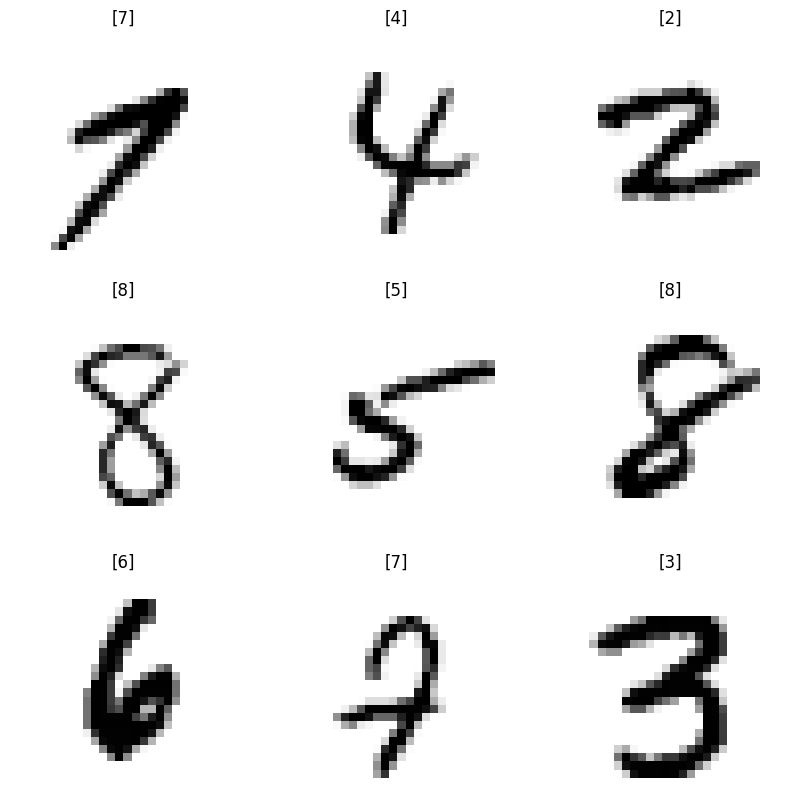

In [31]:
plt.figure(figsize=(10, 10))
j = 1
x = 123
for i in range(x,x+9):
    ax = plt.subplot(3,3,j)
    j =j +1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title(Y_train[i])
    plt.axis("off")
plt.show()

In [32]:
print(type(X_train), type(Y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [33]:
Y_train.shape
X_train = np.array(X_train)

In [34]:
print(X_train.shape, Y_train.shape)

(180109, 28, 28) (180109, 1)


In [39]:
i = 0
checkDict = {
    1 : 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7:0,
    8: 0,
    9: 0,
    0: 0,
}
while i < X_train.shape[0]:
  checkDict[Y_train[i][0]] = checkDict[Y_train[i][0]] +1
  i = i + 1
print(checkDict)

{1: 22387, 2: 19990, 3: 20319, 4: 19462, 5: 18204, 6: 19663, 7: 20784, 8: 19542, 9: 19758, 0: 0}


In [51]:
x = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
y = []
for i in x:
  y.append(checkDict[int(i)])
print(y)

[22387, 19990, 20319, 19462, 18204, 19663, 20784, 19542, 19758]


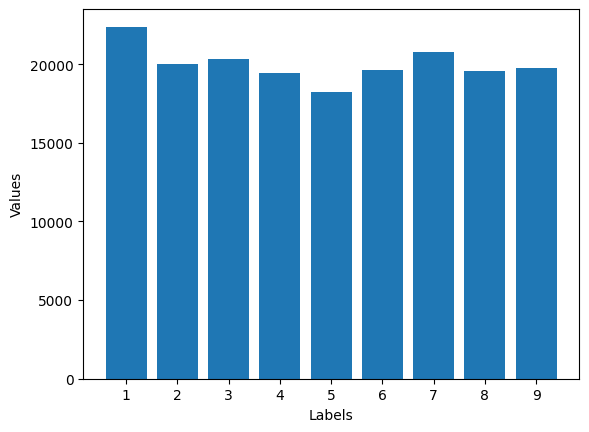

<Figure size 2000x1800 with 0 Axes>

In [52]:
x = np.array(x)
y = np.array(y)
plt.bar(x,y)
plt.xlabel('Labels')
plt.ylabel('Values')
plt.figure(figsize=(20, 18))
plt.show()

In [42]:
X_train1 , X_test1, Y_train1, Y_test1 = train_test_split(X_train, Y_train, stratify=Y_train, train_size=0.85)

In [43]:
print(X_train1.shape, X_test1.shape)

(153092, 28, 28) (27017, 28, 28)


In [44]:
a,b,c,d = [], [], [], []
for digit in X_train1:
  x1 = 0
  for i in range(digit.shape[0]):
                      for j in range(digit.shape[1]):
                          if digit[i][j] == 255 :
                              x1 = i
                              #print(f'{x1} lan {i}')
                              break
                      if x1 != 0 :
                          break
  tmp1 = digit.shape[0]
  h = tmp1
  while tmp1 > 0:
                      for j in range(digit.shape[1]):
                          if digit[tmp1-1][j] == 255 :
                              h = tmp1
                              #print(f'{h} lan {tmp1}')
                              break
                      if h != digit.shape[0]:
                          break
                      tmp1 = tmp1 -1

  y1 = 0
  for j in range(digit.shape[1]):
                      for i in range(digit.shape[0]):
                          if digit[i][j] == 255:
                              y1 = j
                              #print(f'{y1} lan {j}')
                              break
                      if y1 != 0:
                          break

  tmp2 = digit.shape[1]
  w = tmp2
  while tmp2 > 0:
                      for j in range(digit.shape[0]):
                          if digit[j][tmp2-1] == 255 :
                              w = tmp2
                              #print(f'{w} lan {tmp2}')
                              break
                      if w != digit.shape[1]:
                          break
                      tmp2 = tmp2 -1
  a.append(x1)
  b.append(h)
  c.append(y1)
  d.append(w)

In [45]:
x1 = np.median(np.array(a))
h = np.median(np.array(b))
y1 = np.median(np.array(c))
w = np.median(np.array(d))
print(f'x1 : {x1}, h : {h}, y1: {y1}, w : {w}')

x1 : 6.0, h : 19.0, y1: 12.0, w : 18.0


In [46]:
num_classes = 9



# Chuyển đổi giá trị pixel từ [0..255] về [0..1]
x_train = X_train1.astype("float32") / 255
x_test = X_test1.astype("float32") / 255

# Đảm bảo hình ảnh đầu vào có dạng (28, 28, 1)
x_test = np.expand_dims(x_test, -1)
x_train = np.expand_dims(x_train, -1)

# Chuyển đổi các nhãn thành vector ma trận nhị phân
Y_train1 = Y_train1 - 1
y_train = to_categorical(Y_train1, num_classes=9)
Y_test1 = Y_test1 - 1
y_test = to_categorical(Y_test1, num_classes=9)

In [47]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.layers import BatchNormalization, Dropout
from keras.models import Sequential
input_shape = (28, 28, 1)
batch_size = 32
epochs = 50
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(input_shape)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        9232      
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 16)        6

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)
checkPoint = ModelCheckpoint('model_number_{epoch}.h5', save_freq = 'epoch')

H = model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.15, callbacks=[checkPoint],verbose=1
)


Epoch 1/50
4067/4067 [==============================] - 27s 6ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0311 - val_accuracy: 0.9912
Epoch 2/50
  19/4067 [..............................] - ETA: 22s - loss: 0.0404 - accuracy: 0.9885

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4067/4067 [==============================] - 27s 7ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0317 - val_accuracy: 0.9904
Epoch 3/50
4067/4067 [==============================] - 23s 6ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 4/50
4067/4067 [==============================] - 26s 6ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0300 - val_accuracy: 0.9912
Epoch 5/50
4067/4067 [==============================] - 24s 6ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0249 - val_accuracy: 0.9928
Epoch 6/50
4067/4067 [==============================] - 22s 5ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0246 - val_accuracy: 0.9921
Epoch 7/50
4067/4067 [==============================] - 23s 6ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0302 - val_accuracy: 0.9905
Epoch 8/50
4067/4067 [==============================] - 23s 6ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.0306 - val_accuracy: 0.9

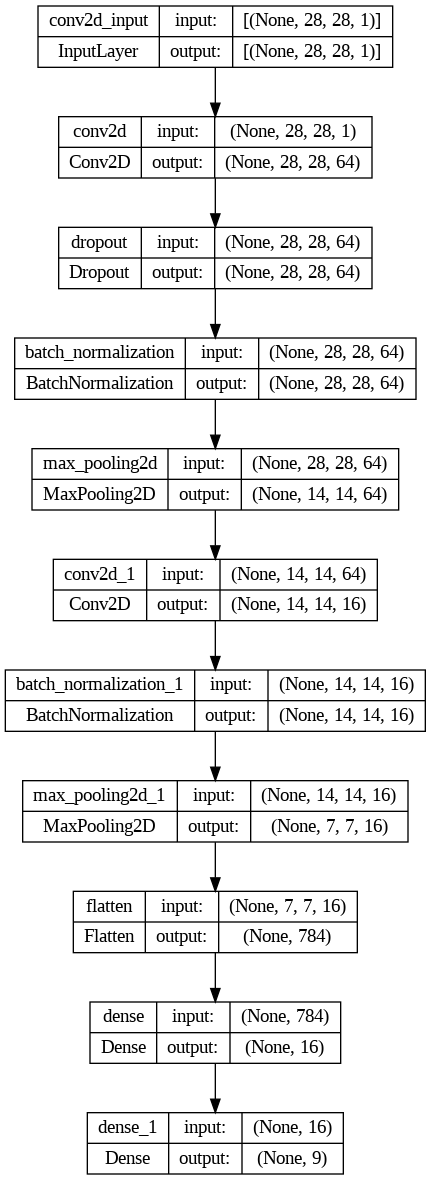

In [54]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [55]:

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026069635525345802
Test accuracy: 0.9938927292823792


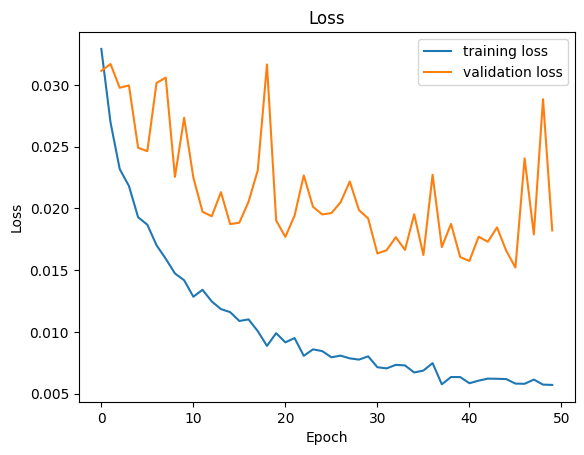

In [56]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(np.arange(0, epochs), H.history['loss'], label='training loss')
plt.plot(np.arange(0, epochs), H.history['val_loss'], label='validation loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


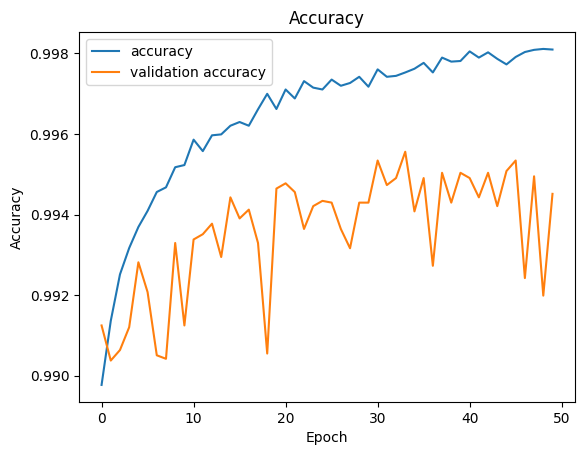

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(np.arange(0, epochs), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, epochs), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [59]:

max_test = -1.0
index = 0
for i in range(1, epochs + 1):
  model_name = '/content/model_number_' + str(i) + '.h5'
  loaded_model = tf.keras.models.load_model(model_name)
  loss, accuracy = loaded_model.evaluate(x_test, y_test)
  print(accuracy)
  if accuracy > max_test:
    print(i)
    max_test = accuracy
    index = i
print(index)

845/845 [==============================] - 3s 3ms/step - loss: 0.0330 - accuracy: 0.9905
0.9904874563217163
1
845/845 [==============================] - 3s 3ms/step - loss: 0.0353 - accuracy: 0.9896
0.9895621538162231
845/845 [==============================] - 2s 3ms/step - loss: 0.0339 - accuracy: 0.9899
0.9898582100868225
845/845 [==============================] - 3s 3ms/step - loss: 0.0331 - accuracy: 0.9905
0.9905244708061218
4
845/845 [==============================] - 2s 3ms/step - loss: 0.0288 - accuracy: 0.9918
0.9917829632759094
5
845/845 [==============================] - 2s 3ms/step - loss: 0.0267 - accuracy: 0.9921
0.9921160936355591
6
845/845 [==============================] - 3s 3ms/step - loss: 0.0323 - accuracy: 0.9906
0.9905614852905273
845/845 [==============================] - 3s 4ms/step - loss: 0.0332 - accuracy: 0.9901
0.9901173114776611
845/845 [==============================] - 2s 3ms/step - loss: 0.0255 - accuracy: 0.9927
0.9927452802658081
9
845/845 [=========

845/845 [==============================] - 2s 2ms/step
4 4


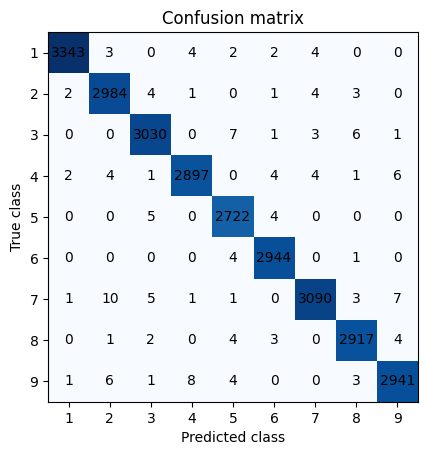

In [60]:
from sklearn.metrics import confusion_matrix
model_name = '/content/model_number_' + str(index) + '.h5'
loaded_model = tf.keras.models.load_model(model_name)
y_pred = loaded_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1) +1
y_true = np.argmax(y_test, axis=1) +1
print(y_pred[123], y_true[123])
cm = confusion_matrix(y_true, y_pred)

# Vẽ đồ thị
plt.imshow(cm, cmap='Blues') # Sử dụng màu xanh
#plt.colorbar() # Thêm thanh màu
plt.title('Confusion matrix') # Thêm tiêu đề
plt.xlabel('Predicted class') # Thêm nhãn trục x
plt.ylabel('True class') # Thêm nhãn trục y
labels_tick = []
ticks = []
# Thêm các giá trị trong ma trận vào đồ thị
for i in range(1,10):
    labels_tick.append(i-1)
    ticks.append(i)
    for j in range(1,10):
        plt.text(j-1, i-1, cm[i-1, j-1], ha='center', va='center', color='black') # Sử dụng màu đỏ
plt.xticks(labels_tick, ticks)
plt.yticks(labels_tick, ticks)
# Hiển thị đồ thị
plt.show()